In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("ticks")

In [2]:
path = "Time Series COVID-19 Confirmed Global - Regression Task - Data.csv"
df = pd.read_csv(path)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [3]:
df = df[df['Country/Region'] == "Thailand"]
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020
209,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,212,272,322,411,599,721,827,934,1045,1136


In [4]:
df = pd.DataFrame({
    'Time' : pd.to_datetime(df.columns[4:]),
    'n' : df.values[0][4:].astype(np.int)
})

df['t'] = df.Time.apply(lambda x: x.toordinal())

In [5]:
df.head()

,Time,n,t
0,2020-01-22,2,737446
1,2020-01-23,3,737447
2,2020-01-24,5,737448
3,2020-01-25,7,737449
4,2020-01-26,8,737450


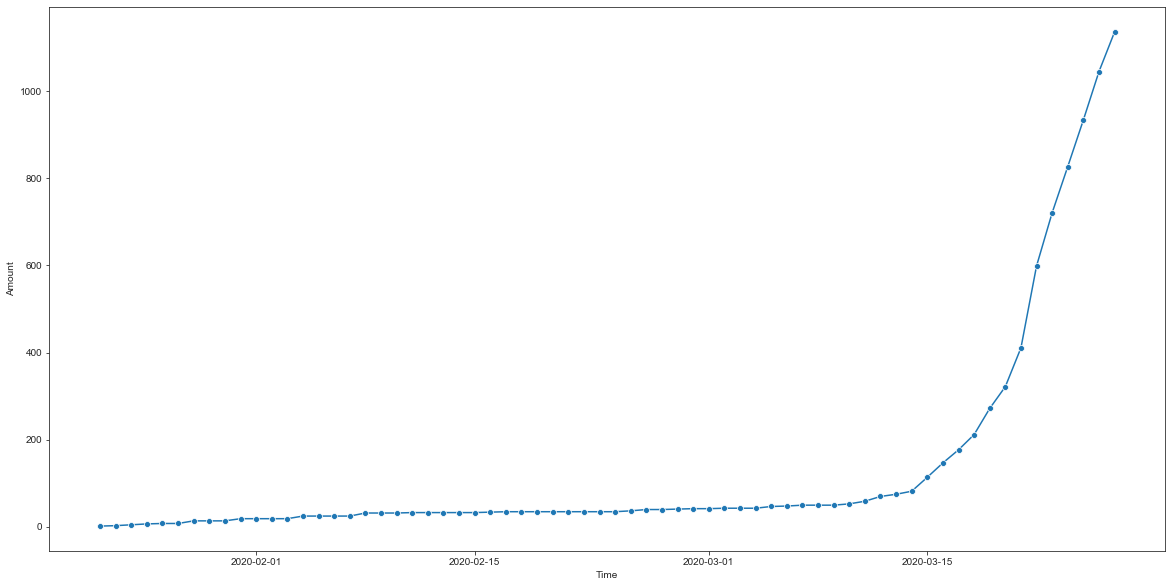

In [6]:
plt.figure(figsize=(20, 10))
sns.lineplot(marker = 'o', 
             x = df.Time, 
             y = df.n, 
             legend = False)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [7]:
df.head(10)

,Time,n,t
0,2020-01-22,2,737446
1,2020-01-23,3,737447
2,2020-01-24,5,737448
3,2020-01-25,7,737449
4,2020-01-26,8,737450
5,2020-01-27,8,737451
6,2020-01-28,14,737452
7,2020-01-29,14,737453
8,2020-01-30,14,737454
9,2020-01-31,19,737455


In [8]:
df['n'].values[-1]

1136

In [9]:
np.arange(4)

array([0, 1, 2, 3])

In [16]:
df2 = df.drop(np.arange(4)).reset_index(drop = True)
df2.head()

,Time,n,t
0,2020-01-26,8,737450
1,2020-01-27,8,737451
2,2020-01-28,14,737452
3,2020-01-29,14,737453
4,2020-01-30,14,737454


In [24]:
# inesrt feature n when t-1 and t-2
n = df.n.values
name_list = ['n1', 'n2', 'n3', 'n4']
df2 = df.drop(np.arange(4)).reset_index(drop = True)

for i in np.arange(4)[::-1]:
    df2[name_list[-i + 3]] = n[i:i-4]

In [25]:
df2

,Time,n,t,n1,n2,n3,n4
0,2020-01-26,8,737450,7,5,3,2
1,2020-01-27,8,737451,8,7,5,3
2,2020-01-28,14,737452,8,8,7,5
3,2020-01-29,14,737453,14,8,8,7
4,2020-01-30,14,737454,14,14,8,8
...,...,...,...,...,...,...,...
57,2020-03-23,721,737507,599,411,322,272
58,2020-03-24,827,737508,721,599,411,322
59,2020-03-25,934,737509,827,721,599,411
60,2020-03-26,1045,737510,934,827,721,599


### 0.1 Polynomial Regerssion (2 Degree)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [27]:
X = df2[['t', 'n1', 'n2', 'n3', 'n4']].values
y = df2.n.values.reshape((-1, 1))

In [41]:
X[0]

array([737450,      7,      5,      3,      2], dtype=int64)

In [38]:
X.shape

(62, 5)

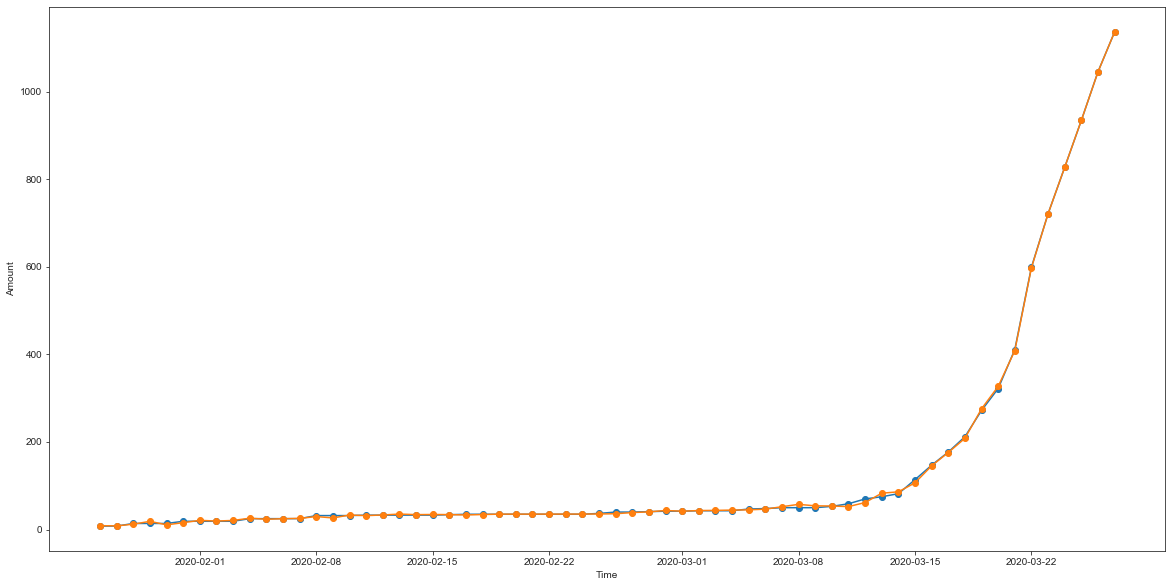

MSE of model   : 8.52
Score of model : 1.00


In [42]:
X_poly = PolynomialFeatures(degree=2).fit_transform(X)

reg = LinearRegression().fit(X_poly, y)

pred = reg.predict(X_poly)

plt.figure(figsize=(20, 10))
plt.plot(df2.Time, df2.n, marker = 'o')
plt.plot(df2.Time, pred , marker = 'o')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

print(f'MSE of model   : {mean_squared_error(y, pred):.2f}')
print(f'Score of model : {reg.score(X_poly, y):.2f}')